In [1]:
import pandas as pd
import voila

# Load the data
df = pd.read_csv('data/data.csv')

# Rename columns for clarity
df.rename(columns={"How many cups of coffee do you typically drink per day?": 'cups', 
                   'What is your age?': 'age'}, inplace=True)

# Select relevant columns
df = df[['cups', 'age']]

# Drop rows with missing values in 'cups' and 'age'
df.dropna(subset=['cups', 'age'], inplace=True)

# Convert age entries to numeric values
def convert_age(age_entry):
    if isinstance(age_entry, str):
        # Handle ranges, less than, and greater than values
        if '-' in age_entry:
            low, high = age_entry.split('-')
            return (int(low) + int(high.split()[0])) / 2
        elif age_entry.startswith('<'):
            return 16  # or another representative value for under 18
        elif age_entry.startswith('>'):
            return 70  # or another representative value for over 65
    return age_entry

df['age'] = df['age'].apply(convert_age)

# Convert cups entries to numeric values
def convert_cups(cups_str):
    if cups_str == 'Less than 1':
        return 0.5
    elif cups_str == 'More than 4':
        return 5
    else:
        return float(cups_str)

df['cups'] = df['cups'].apply(convert_cups)


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data for modeling
X = df[['age']]
y = df['cups']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

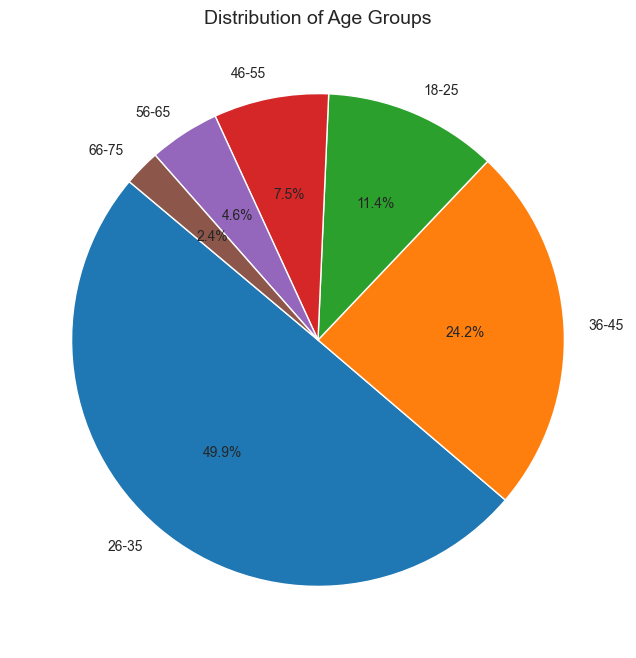

C:\Users\devin\AppData\Local\Temp\ipykernel_6572\1100606257.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_avg = df.groupby('age_group')['cups'].mean().reset_index()


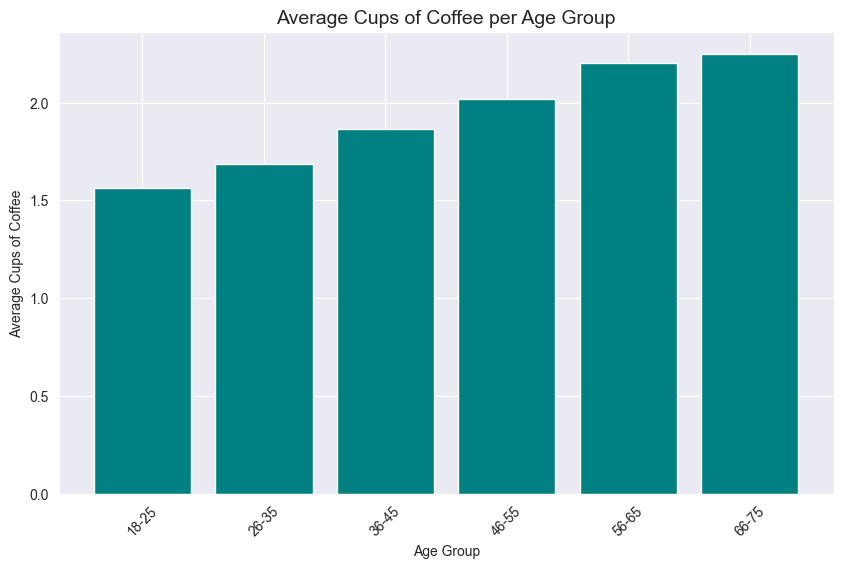

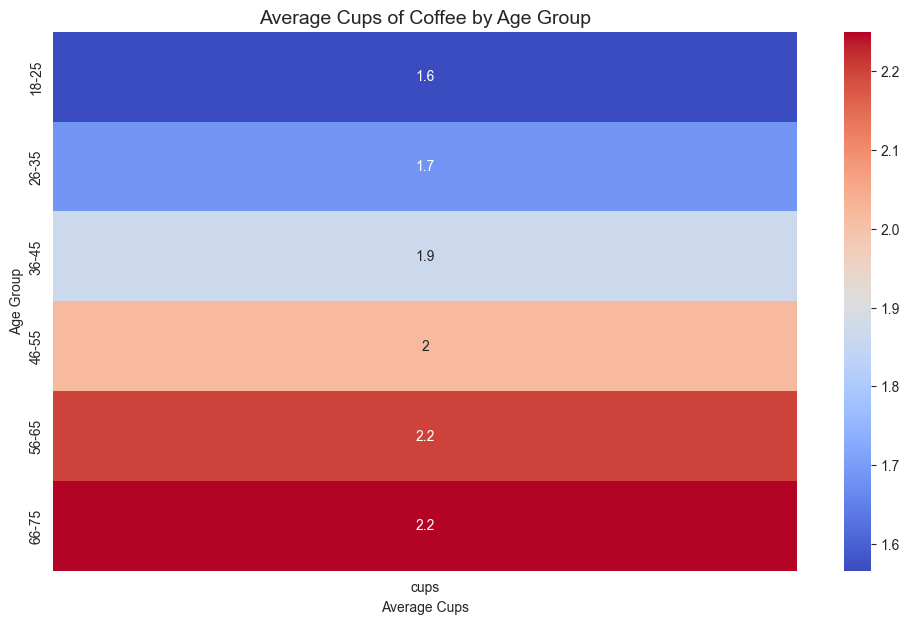

IntSlider(value=30, continuous_update=False, description='Age:', max=75, min=18)

Output()

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from IPython.display import display, HTML
import ipywidgets as widgets

# HTML for styling
display(HTML("""
<style>
    body { font-family: Helvetica, sans-serif; }
    h1 { color: #0F0F0F; }
    .custom-heading { color: #232D3F; font-size: 24px; font-weight: bold; margin-top: 30px; }
    .custom-text { font-size: 18px; }
    .figure-title { text-align: center; color: maroon; font-size: 20px; }
    .widget-label { font-weight: bold; margin-right: 10px; }
    .widget-container { display: flex; align-items: center; justify-content: center; margin-top: 20px; }
</style>
"""))

# Title
display(HTML('<h1>Linear Regression Analysis of Coffee Consumption by Age</h1>'))
display(HTML('<h2>Descriptive: Data Visualizations</h2>'))

# Assuming df is your DataFrame with the 'age' and 'cups' columns

# Define your age groups
bins = [18, 25, 35, 45, 55, 65, 75]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Pie Chart
display(HTML('<div class="custom-heading">Pie Chart: Age Group Distribution</div>'))
age_group_counts = df['age_group'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Age Groups', fontsize=14)
plt.show()

# Bar Graph
display(HTML('<div class="custom-heading">Bar Graph: Average Cups of Coffee per Age Group</div>'))
age_group_avg = df.groupby('age_group')['cups'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(age_group_avg['age_group'], age_group_avg['cups'], color='teal')
plt.xlabel('Age Group')
plt.ylabel('Average Cups of Coffee')
plt.title('Average Cups of Coffee per Age Group', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Heatmap
display(HTML('<div class="custom-heading">Heatmap: Heatmap of Average Coffee Consumption by Age Group</div>'))
heatmap_data = df.pivot_table(values='cups', index='age_group', aggfunc='mean')
plt.figure(figsize=(12, 7))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Average Cups of Coffee by Age Group', fontsize=14)
plt.ylabel('Age Group')
plt.xlabel('Average Cups')
plt.show()

# Train your model
X = df[['age']]
y = df['cups']
model = LinearRegression()
model.fit(X, y)

# Function to predict coffee consumption
display(HTML('<h2>Predictive: Analytic Engine</h2>'))
display(HTML('<div class="custom-heading">How many cups a day might someone at a certain age drink?</div>'))
def predict_coffee(age):
    # Convert the input age to a DataFrame
    input_df = pd.DataFrame([[age]], columns=['age'])
    # Predict using the model
    prediction = model.predict(input_df)
    # Display the prediction
    display(HTML(f'<div class="custom-text">Predicted cups of coffee for age {age}: {prediction[0]:.2f} cups</div>'))

# Interactive widget for input
age_input = widgets.IntSlider(
    value=30,
    min=18,
    max=75,
    step=1,
    description='Age:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

# Connect the widget to the prediction function
interactive_prediction = widgets.interactive_output(predict_coffee, {'age': age_input})

# Display the widget and prediction
display(HTML('<div class="widget-container">'))
display(age_input)
display(interactive_prediction)
display(HTML('</div>'))
